C:\Users\dshah\AppData\Local\Temp\ipykernel_21180\1746901772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loss_percentage'] = pd.to_numeric(data['loss_percentage'], errors='coerce')
C:\Users\dshah\AppData\Local\Temp\ipykernel_21180\1746901772.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loss_quantity'] = pd.to_numeric(data['loss_quantity'], errors='coerce')


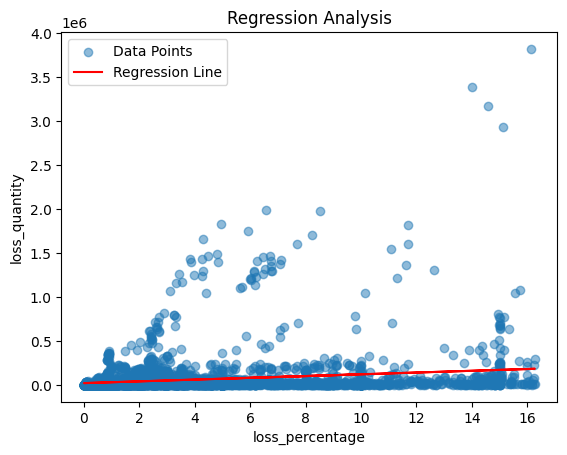

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def clean_data(data):
    data = data.dropna(subset=['loss_percentage', 'loss_quantity'])
    data['loss_percentage'] = pd.to_numeric(data['loss_percentage'], errors='coerce')
    data['loss_quantity'] = pd.to_numeric(data['loss_quantity'], errors='coerce')
    data = data.drop_duplicates()
    return data

def perform_regression(data, feature_column, target_column):
    """
    Perform linear regression on the given feature and target columns.
    """
    X = data[[feature_column]]
    y = data[target_column]
    model = LinearRegression().fit(X, y)
    return model

def plot_regression(data, feature_column, target_column, model):
    """
    Plot the regression line.
    """
    plt.scatter(data[feature_column], data[target_column], alpha=0.5, label="Data Points")
    plt.plot(data[feature_column], model.predict(data[[feature_column]]), color="red", label="Regression Line")
    plt.title("Regression Analysis")
    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    data = pd.read_csv(r"C:\Users\dshah\OneDrive\Documents/cleaned_FAO_food_loss.csv")
    cleaned_data = clean_data(data)
    model = perform_regression(cleaned_data, "loss_percentage", "loss_quantity")
    plot_regression(cleaned_data, "loss_percentage", "loss_quantity", model)
